<center><font size="5"><b><I>Discovering the beyond💫✨</I></b></font> </center>

![Text](1.jpg)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px

from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn import tree
from imblearn.over_sampling import SMOTE 

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

# Dataset Information

Reference: https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

The Sloan Digital Sky Survey offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone.<br><br>
For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048 x 2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.

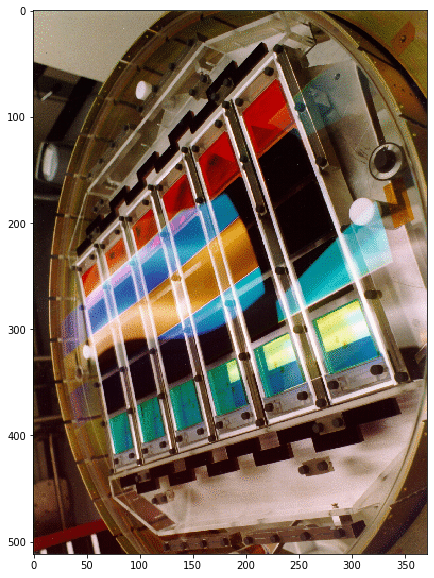

In [3]:
plt.figure(figsize=(20,10))
img1 = plt.imread('CCDs_filters1.gif')
plt.imshow(img1)

# Attribute Information

<H3>About dataset</H3>

<ul>
    
<li><b>objid</b> : Object Identifier</li>

<li><b>right_asc</b> : Right Ascension. It is the angular distance of a particular point measure from East to west. It is analogous to longitude on Earth. 

<li><b>declination</b> : Declination. It is the angular distance of a point north or south of the celestial equator. It is measured in degrees. Analogous to latitude on Earth.

<li><b>u_band, g_band, r_band, i_band, z_band</b> : represents the different wavelengths used to capture the observations. The bands are Ultraviolet, Green, Red, Near-infrared and Infrared respectively.
The SDSS imaging camera takes images in five filters: u,g,r,i,z. Each letter designates a section of light of the electromagnetic spectrum.

<li><b>run</b> : Run Number, which indentifies the specific scan

<li><b>rerun</b> : Rerun Number, tells us how the image has been processed

<li><b>camcol</b> : Camera column. The SDSS camera had six parallel camera columns, meaning that each run is divided into six parallel scanlines, one for each camera column. These images are known as camcols, and are numbered 1 through 6.

<li><b>field</b> : Field number. A field is a part of a camcol that is processed by the Photo pipeline at one time. Fields are 2048x1489 pixels. A field consists of the frames in the 5 filters for the same part of the sky.
</ul>

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels.

<ul>

<li><b>specobjid</b> : Object Identifier

<li><b>redshift</b> : It is a ratio of the obseved wavelength and a reference wavelength. The wavelength at which the radiation is originally emitted from the space object is lengthened as it travels through space. Using this one can understand how far the space objects are.

<li><b>mod_julian_date</b> : Modified Julian Date is the number of days passed since November 17th 1858. This date tells us when the record was taken.

<li><b>fiberid</b> : fiber ID. It gives the specific optical fiber chosen to record the observation.

<li><b>plate</b> : plate number. It gives the specfic plate number of the SDSS camera used to record observations.

</ul>

<H4>Target Variable</H4>

The target variable is 'class' which has 3 categories:
<ul>
<li><b>Star</b>: It is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.<br><br>
    
<li><b>Galaxy</b>: It is a huge collection of gas, dust, and billions of stars and their solar systems, all held together by gravity. We are a part of the milky way galaxy.<br><br>

<li><b>QS0(Quasar)</b>: It is an astronomical object of very high luminosity found in the centres of some galaxies and it is powered by gas spiraling at high velocity into an extremely large black hole.
</ul>

# Problem Statement

The aim of our model is to classify observations of space objects into a star, a galaxy or a quasar.

# Data Preprocessing

In [4]:
data = pd.read_csv('sky_survey_dr16.csv')#read the dataset
data.shape

(100000, 18)

In [5]:
data.head() #first 5 observations

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [6]:
data.tail() #last 5 observations

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268
99999,1237670459113730000,37.440188,25.400888,18.11769,16.86279,16.31057,16.07582,15.94701,5817,301,5,120,2678586035360790000,STAR,-0.000085,2379,53762,255


In [7]:
#Renaming columns
data.rename(columns={'ra':'right_asc','dec':'declination','u':'u_band','g':'g_band','r':'r_band','i':'i_band',
                     'z':'z_band','mjd':'mod_julian_date'},inplace=True)
data.columns

Index(['objid', 'right_asc', 'declination', 'u_band', 'g_band', 'r_band',
       'i_band', 'z_band', 'run', 'rerun', 'camcol', 'field', 'specobjid',
       'class', 'redshift', 'plate', 'mod_julian_date', 'fiberid'],
      dtype='object')

<H4>Removing insignificant features</H4>

In [8]:
data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

data.head(1)

,right_asc,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mod_julian_date,fiberid
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,7255,56597,832


<b>objid</b> and <b>specobjid</b> are just identifiers for accessing a specific records. Therefore we will not need them for classification as they are not related to the outcome.<br><br>
The features <b>'run','rerun', 'camcol'</b> and <b>'field'</b> are values which describe parts of the camera used at SDSS when making observations. These are not essential to our analysis.

In [9]:
data.info() #checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   right_asc        100000 non-null  float64
 1   declination      100000 non-null  float64
 2   u_band           100000 non-null  float64
 3   g_band           100000 non-null  float64
 4   r_band           100000 non-null  float64
 5   i_band           100000 non-null  float64
 6   z_band           100000 non-null  float64
 7   class            100000 non-null  object 
 8   redshift         100000 non-null  float64
 9   plate            100000 non-null  int64  
 10  mod_julian_date  100000 non-null  int64  
 11  fiberid          100000 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 9.2+ MB


<b>There are 11 numerical features and 1 categorical feature. </b>

In [10]:
data.isnull().sum() #checking the missing values if present

right_asc          0
declination        0
u_band             0
g_band             0
r_band             0
i_band             0
z_band             0
class              0
redshift           0
plate              0
mod_julian_date    0
fiberid            0
dtype: int64

<b>No missing values present</b>

# Data Visualization

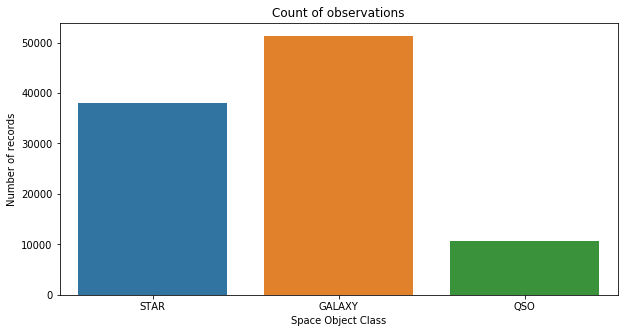

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data['class'])
plt.xlabel('Space Object Class')
plt.ylabel('Number of records')
plt.title('Count of observations')
plt.show()

<b>Interpretation: This chart tells us the number of records in each space object class. Galaxy has the highest count of records while Quasars have the least.</b>

<h4>Variation in the right ascension for Stars, Galaxies and Quasars</h4>

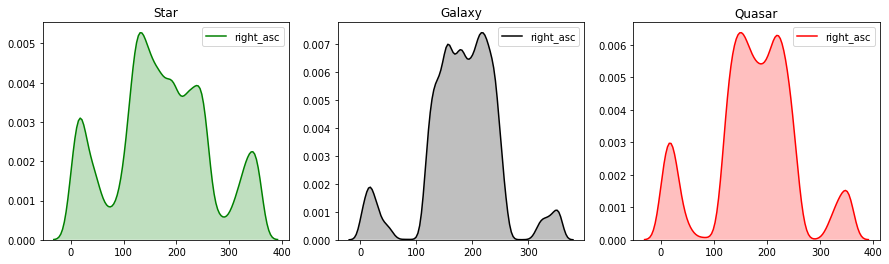

In [12]:
fig, axs = plt.subplots(1, 3,figsize=(15, 4))

ax = sns.kdeplot(data[data['class']=='STAR'].right_asc, ax = axs[0],color='green',shade=True)
ax.set_title('Star')

ax = sns.kdeplot(data[data['class']=='GALAXY'].right_asc, ax = axs[1],color='black',shade=True)
ax.set_title('Galaxy')

ax = sns.kdeplot(data[data['class']=='QSO'].right_asc, ax = axs[2],color='red',shade=True)
ax.set_title('Quasar')

plt.show()

<b>Interpretation: All 3 graphs have a nearly normal distribution with most of its values having a high right ascension of around 180 degrees.</b>

<h4>To visualize the timeline of discovery for different space objects</h4>

In [13]:
timeline_stars  = data.loc[data['class']=='STAR'  , 'mod_julian_date']
timeline_galaxy = data.loc[data['class']=='GALAXY', 'mod_julian_date']
timeline_qso    = data.loc[data['class']=='QSO'   , 'mod_julian_date']

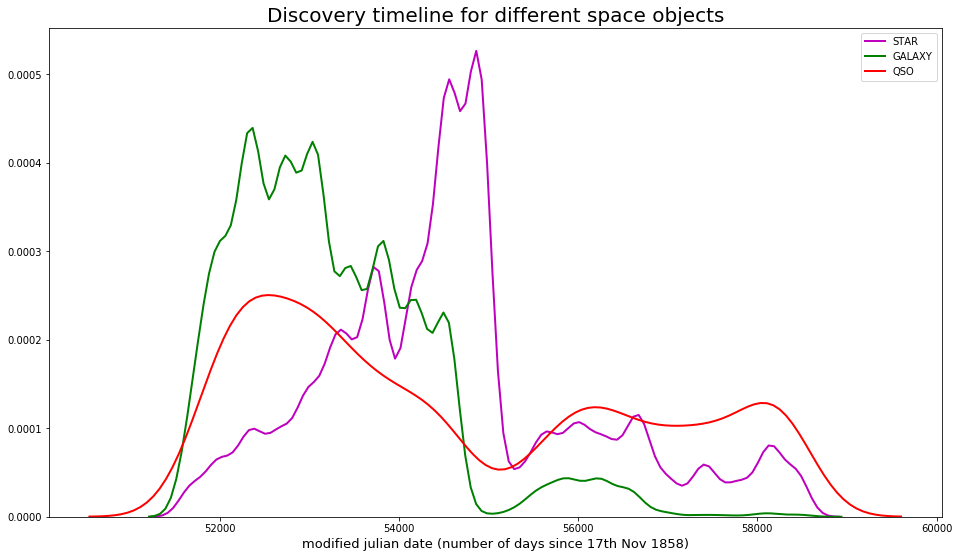

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.distplot(timeline_stars , hist=False, label='STAR'  , ax=ax,color='m',kde_kws={'linewidth':2})
sns.distplot(timeline_galaxy, hist=False, label='GALAXY', ax=ax,color='g',kde_kws={'linewidth':2})
sns.distplot(timeline_qso   , hist=False, label='QSO'   , ax=ax,color='r',kde_kws={'linewidth':2})

plt.title("Discovery timeline for different space objects",fontdict={'fontsize':20})
plt.xlabel('modified julian date (number of days since 17th Nov 1858)',fontdict={'fontsize':13})
plt.ylabel('')
plt.show()

<b>Interpretation: We can see that there is sudden increase in the number of Galaxy as well as quasars discovered around 52000 MJD (that is April 1st 2001)<br><br> The discovery of stars increased around 54500 MLD (in the year 2008). </b>

<h4>How does the declination angle vary for a star, galaxy and a quasar?</h>

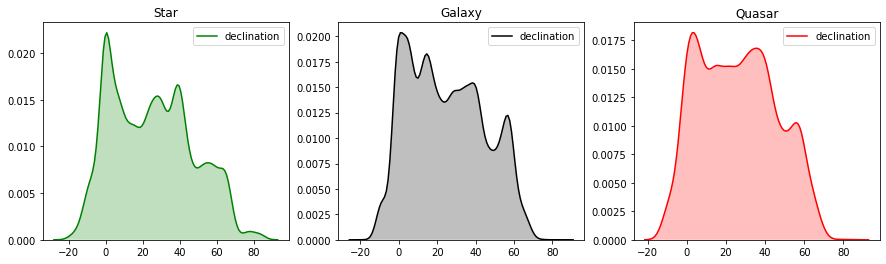

In [15]:
fig, axs = plt.subplots(1, 3,figsize=(15, 4))

ax = sns.kdeplot(data[data['class']=='STAR'].declination, ax = axs[0],color='green',shade=True)
ax.set_title('Star')

ax = sns.kdeplot(data[data['class']=='GALAXY'].declination, ax = axs[1],color='black',shade=True)
ax.set_title('Galaxy')

ax = sns.kdeplot(data[data['class']=='QSO'].declination, ax = axs[2],color='red',shade=True)
ax.set_title('Quasar')

plt.show()

<b>Interpretation: The declination angle for a majority of stars is close to 0. While many quasars and galaxies have a declination angle close to 0 as well as around 60 degrees.</b>

<H4>Variation in Band Wavelength for different space objects</H4>

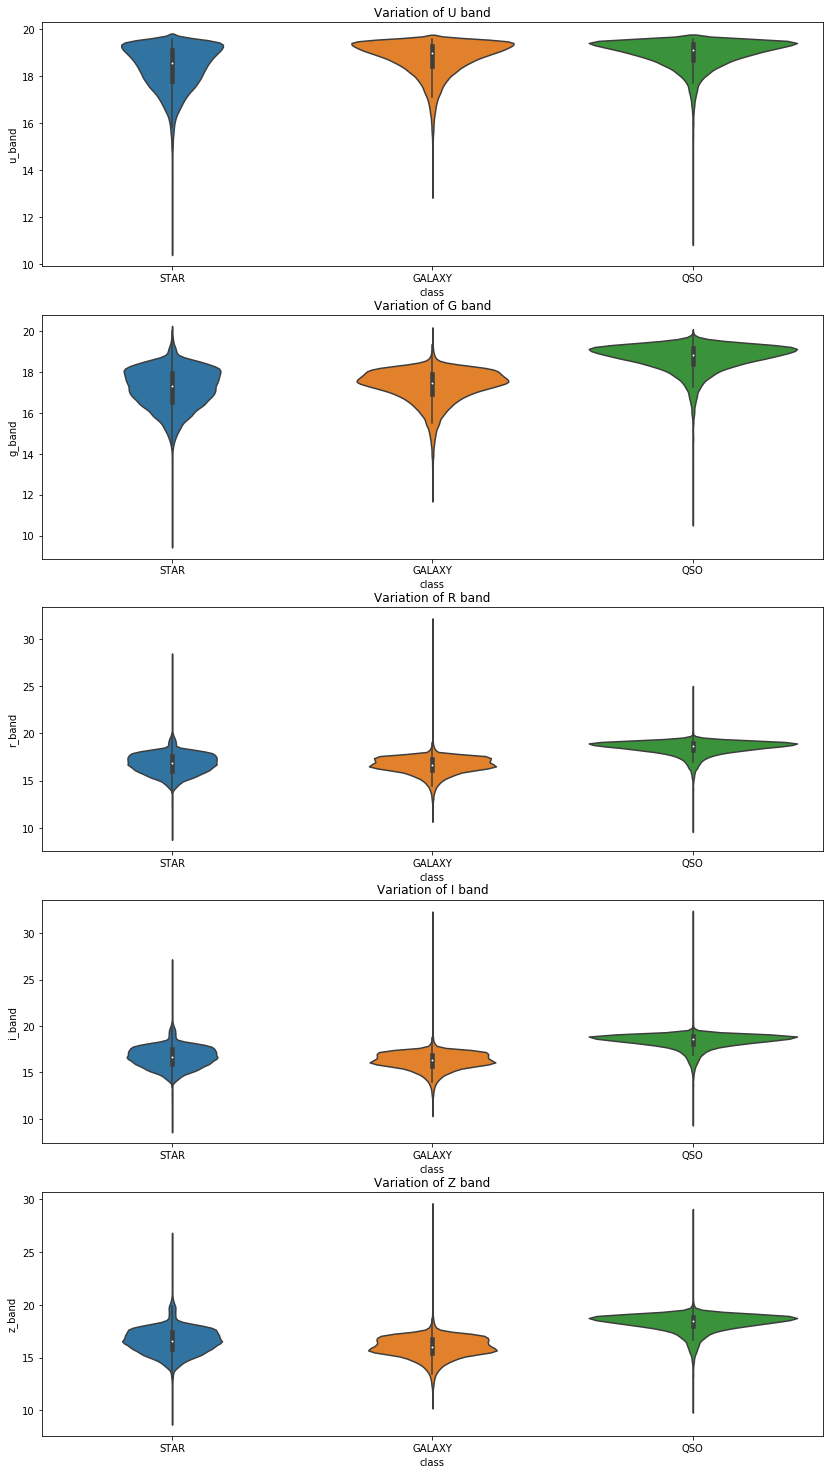

In [16]:
fig, axs = plt.subplots(5, 1,figsize=(14, 26))

ax = sns.violinplot(x=data['class'],y=data['u_band'], ax = axs[0])
ax.set_title('Variation of U band')

ax = sns.violinplot(x=data['class'],y=data['g_band'], ax = axs[1])
ax.set_title('Variation of G band')

ax = sns.violinplot(x=data['class'],y=data['r_band'], ax = axs[2])
ax.set_title('Variation of R band')

ax = sns.violinplot(x=data['class'],y=data['i_band'], ax = axs[3])
ax.set_title('Variation of I band')

ax = sns.violinplot(x=data['class'],y=data['z_band'], ax = axs[4])
ax.set_title('Variation of Z band')


plt.show()

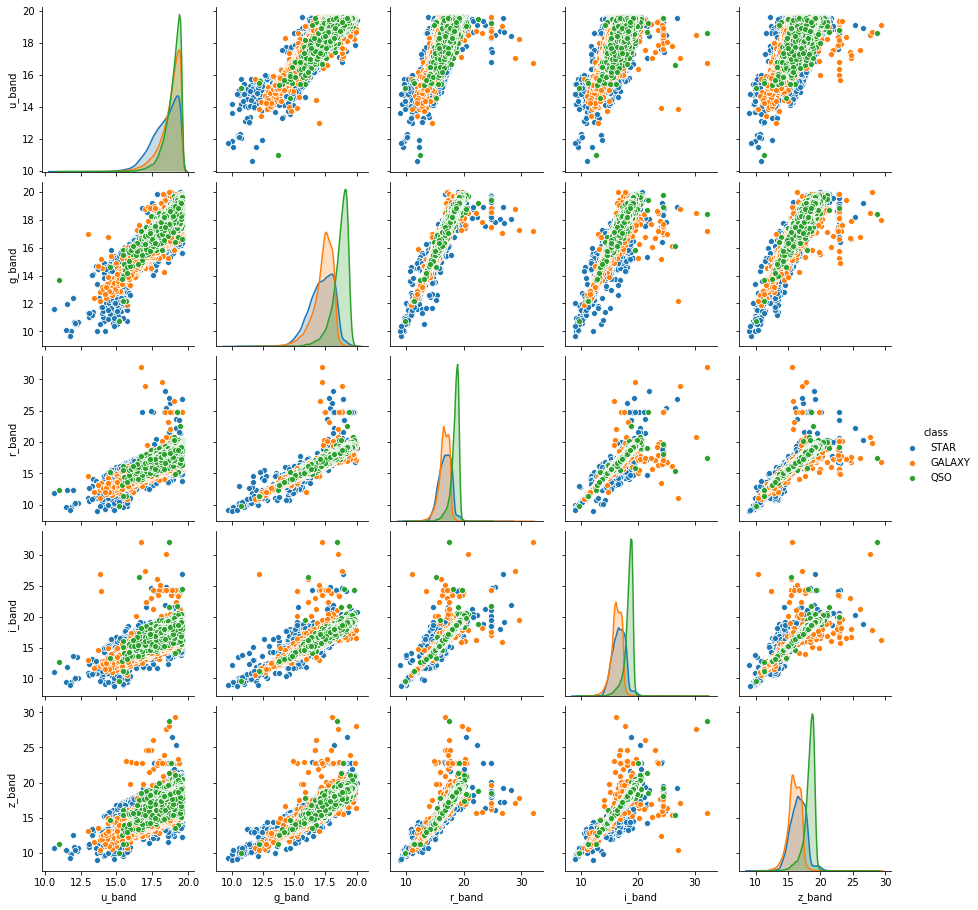

In [17]:
sns.pairplot(data[['u_band','g_band','r_band','i_band','z_band','class']], hue='class')

<b>Interpretation: The pairplot shows us the correlation between all 5 wavelengths for stars, galaxies and quasars.<br> <br>All wavelength radiations are strongly correlated. Also, Hotter objects emit more at every wavelength.</b>

# Correlation

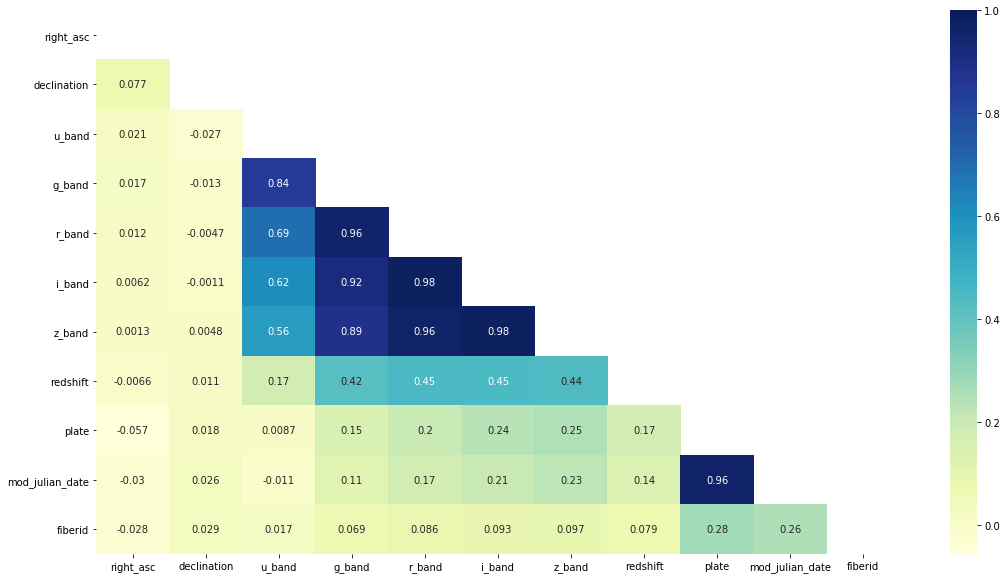

In [18]:
plt.figure(figsize=(18,10))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,cmap="YlGnBu", annot=True, mask=mask)
plt.show()

<b>Interpretation: Generally, The u, g, r, i and z bands have wavelength values very close to eachother. This is the reason for such high correlation among features. From the domain perspective, these variables are very important for our analysis, due to which we have not removed them.</b>

# Data Encoding

In [19]:
data1 = data.copy() #copy of the original dataset

In [20]:
# instantiate the encoder with the list of categories in the required order
orderencoding = OrdinalEncoder(categories = [["GALAXY", "STAR", "QSO"]])

# add a column of ordered labels
# reshape(-1, 1): to rearrange the data
data1['class'] = orderencoding.fit_transform(data1['class'].values.reshape(-1,1))

# display the data
data1['class'].value_counts()

0.0    51323
1.0    38096
2.0    10581
Name: class, dtype: int64

In [21]:
data1.head(2) #checking

,right_asc,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mod_julian_date,fiberid
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,1.0,0.000115,7255,56597,832
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,1.0,-0.000093,8290,57364,868


# Separating Predictor and Target Variables

In [22]:
df_features1=data1.drop(columns = ['class'],axis=1)#without outlier flooring
df_features2=data1.drop(columns = ['class'],axis=1)#for outlier flooring

In [23]:
df_target1 = data1['class']
df_target2 = data1['class']

# Handling Outliers

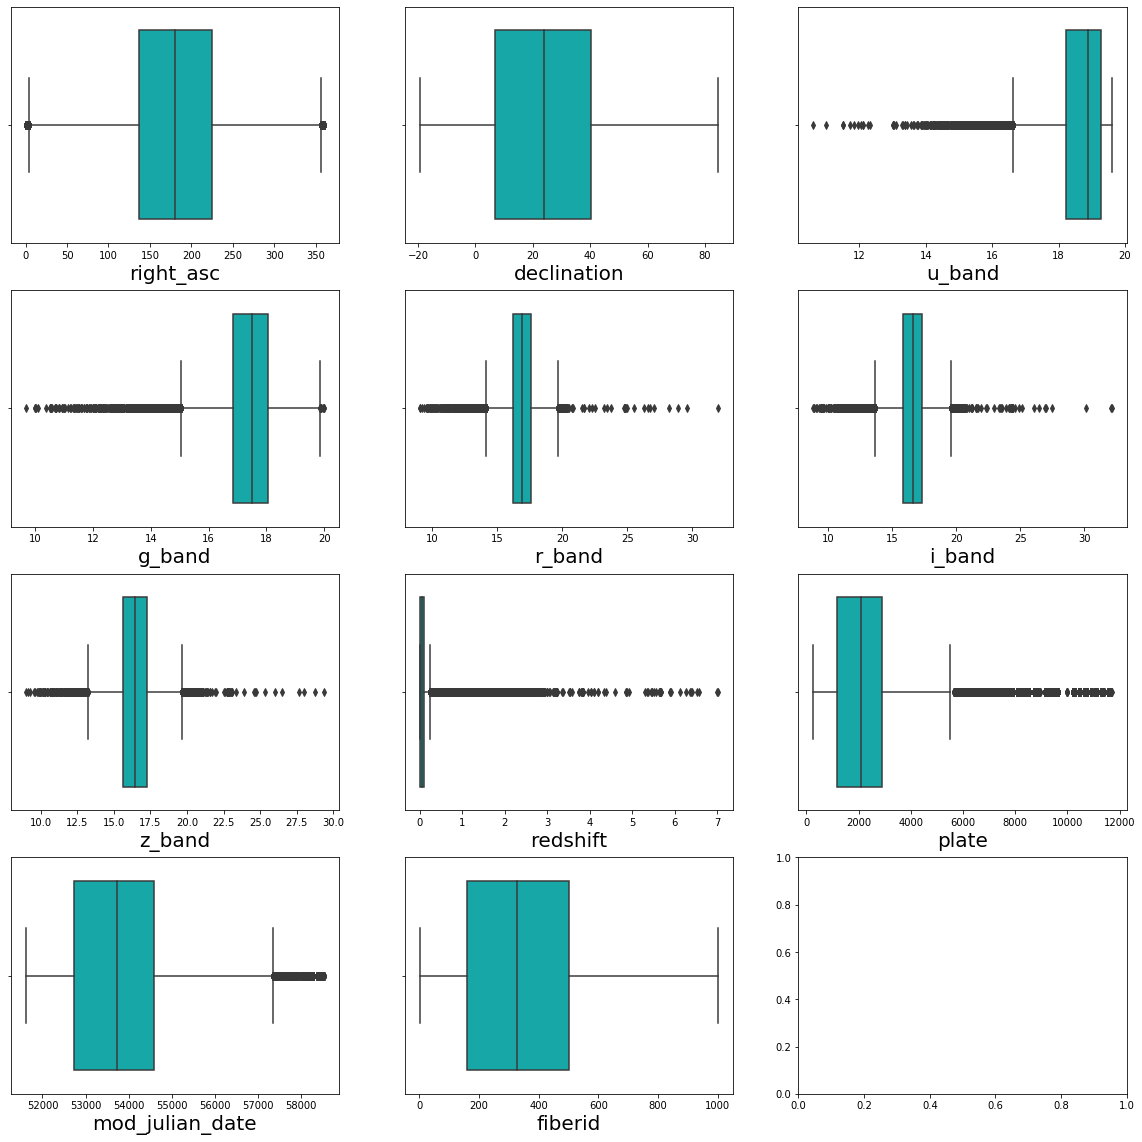

In [24]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))

for variable, subplot in zip(df_features2.columns, ax.flatten()):
    z = sns.boxplot(x = df_features2[variable], orient = "h", whis=1.5 , ax=subplot, color='c') 
    z.set_xlabel(variable, fontsize = 20)   


<b>From these plots we can see that there are many variables having outliers that need to be handled.</b>

In [25]:
print("skewness values before and after handling the outliers:\n")
skew_before = df_features2.skew()
column_name = df_features2.columns
for i in range(df_features2.shape[1]):
    q1=df_features2.quantile(0.25)
    q3=df_features2.quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    df_features2.iloc[:,i]=np.where(df_features2.iloc[:,i] < lb[i],lb[i],df_features2.iloc[:,i])
    df_features2.iloc[:,i]=np.where(df_features2.iloc[:,i] > ub[i],ub[i],df_features2.iloc[:,i])
skew_after = df_features2.skew()
outlier = pd.concat([skew_before,skew_after],axis=1,keys=['skewness before','skewness after'])
outlier

skewness values before and after handling the outliers:



,skewness before,skewness after
right_asc,-0.146952,-0.146019
declination,0.266712,0.266712
u_band,-1.398277,-0.975912
g_band,-0.740838,-0.371819
r_band,-0.144064,-0.046447
i_band,0.054909,0.077910
z_band,0.128181,0.120410
redshift,4.046089,1.183574
plate,1.839684,0.860922
mod_julian_date,0.931705,0.730917


<h1>Feature Scaling</h1>

In [26]:
X_scaler = StandardScaler()#features without flooring the outlier treatment
feature_scaled1 = X_scaler.fit_transform(df_features1)
df_features_scaled1 = pd.DataFrame(feature_scaled1, columns = df_features1.columns)
df_features_scaled1.head()

,right_asc,declination,u_band,g_band,r_band,i_band,z_band,redshift,plate,mod_julian_date,fiberid
0,-1.667639,-1.178162,0.065633,-0.272293,-0.287759,-0.230598,-0.226791,-0.389669,2.111259,1.734118,2.258748
1,-0.784352,0.846200,-0.194147,-0.103121,0.317192,0.580613,0.705310,-0.390143,2.579472,2.229841,2.424595
2,-0.060948,-1.645233,-2.596213,-2.126356,-1.166443,-0.746957,-0.501159,-0.389555,0.123507,0.432443,-1.380672
3,0.303841,0.180834,-0.002769,-0.531149,-0.691260,-0.757044,-0.805267,-0.257025,-0.265087,-0.286258,-1.412920
4,0.452395,0.076489,0.294775,0.479099,0.519436,0.453794,0.456601,-0.224904,-0.210349,-0.078145,-1.233253


In [27]:
X_scaler = StandardScaler()#features with flooring the outlier treatment
feature_scaled2 = X_scaler.fit_transform(df_features2)
df_features_scaled2 = pd.DataFrame(feature_scaled2, columns = df_features2.columns)
df_features_scaled2.head()

,right_asc,declination,u_band,g_band,r_band,i_band,z_band,redshift,plate,mod_julian_date,fiberid
0,-1.669762,-1.178162,0.048505,-0.298464,-0.305430,-0.242551,-0.233396,-0.860602,2.083878,1.841339,2.258748
1,-0.785423,0.846200,-0.230025,-0.121541,0.323211,0.598678,0.723632,-0.863398,2.083878,2.361414,2.424595
2,-0.061156,-1.645233,-2.618451,-2.237471,-1.218523,-0.778017,-0.515101,-0.859929,0.355694,0.473935,-1.380672
3,0.304066,0.180834,-0.024834,-0.569179,-0.724732,-0.788477,-0.827342,-0.078151,-0.207687,-0.281057,-1.412920
4,0.452798,0.076489,0.294185,0.487354,0.533376,0.467167,0.468273,0.111330,-0.128329,-0.062435,-1.233253


<h1>Model Building</h1>

In [28]:
#BASE

<h2>Train Test Split</h2>

In [29]:
# Data without floored outliers

In [30]:
X1 = df_features_scaled1
Y1 = df_target1

In [31]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state = 2, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train1.shape)
print('y_train', y_train1.shape)

# print dimension of test set
print('X_test', X_test1.shape)
print('y_test', y_test1.shape)

X_train (70000, 11)
y_train (70000,)
X_test (30000, 11)
y_test (30000,)


In [32]:
# Data with floored outliers

In [33]:
X2 = df_features_scaled2
Y2 = df_target2

In [34]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, random_state = 2, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train2.shape)
print('y_train', y_train2.shape)

# print dimension of test set
print('X_test', X_test2.shape)
print('y_test', y_test2.shape)

X_train (70000, 11)
y_train (70000,)
X_test (30000, 11)
y_test (30000,)


<h3>Performing SMOTE</h3>

In [35]:
# Data without floored outliers 

In [36]:
df_target1.value_counts()#data is imbalanced

0.0    51323
1.0    38096
2.0    10581
Name: class, dtype: int64

In [37]:
sm1 = SMOTE(random_state=42)
X_sm1, Y_sm1 = sm1.fit_resample(X_train1, y_train1)
Y_sm1.value_counts()

1.0    35940
2.0    35940
0.0    35940
Name: class, dtype: int64

In [38]:
# Data with floored outliers 

In [39]:
df_target2.value_counts() # data is imbalanced

0.0    51323
1.0    38096
2.0    10581
Name: class, dtype: int64

In [40]:
sm2 = SMOTE(random_state=42)
X_sm2, Y_sm2 = sm2.fit_resample(X_train2, y_train2)
Y_sm2.value_counts()

1.0    35940
2.0    35940
0.0    35940
Name: class, dtype: int64

In [41]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report_1(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred1 = model.predict(X_test1)

    # return the classification report for test data
    return(classification_report(y_test1, test_pred1))

In [42]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report_2(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred2 = model.predict(X_test2)

    # return the classification report for test data
    return(classification_report(y_test2, test_pred2))

In [43]:
#--------------------------------------------------------------------------------------------------------------------------

## Classification Algorithms

### 1. K Nearest Neighbour Classifier

In [44]:
# A. without flooring outliers

In [45]:
# define the K nearest neighbours model
knc1 = KNeighborsClassifier()

# train our K nearest neighbours model with the x and y training sets
knc1.fit(X_sm1,Y_sm1)

# compute the performance measures on test data

test_report_knc1 = get_test_report_1(knc1.fit(X_sm1,Y_sm1))

# print the performace measures
print(test_report_knc1)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     15383
         1.0       0.93      0.91      0.92     11475
         2.0       0.91      0.94      0.92      3142

    accuracy                           0.93     30000
   macro avg       0.92      0.93      0.92     30000
weighted avg       0.93      0.93      0.93     30000



In [46]:
# apply the model on unseen testing data

knc_preds1 = knc1.predict(X_test1)

print("Accuracy of K-Nearest Neighbour Classifier:", metrics.accuracy_score(y_test1, knc_preds1))

Accuracy of K-Nearest Neighbour Classifier: 0.9262333333333334


In [47]:
def plot_confusion_matrix_1(model):

    y_pred1 = model.predict(X_test1)

    cm1 = confusion_matrix(y_test1, y_pred1)

    conf_matrix1 = pd.DataFrame(data = cm1,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
    
    sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

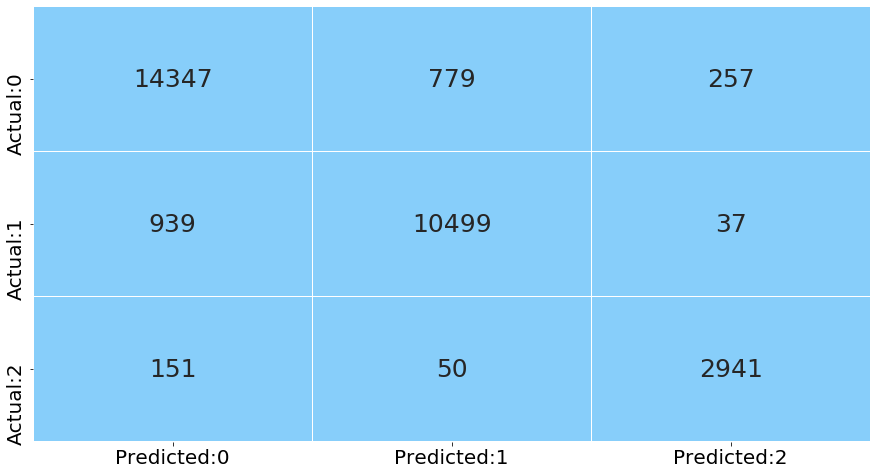

In [48]:
plot_confusion_matrix_1(knc1.fit(X_sm1,Y_sm1))

In [49]:
# B. with outlier flooring

In [50]:
# define the K nearest neighbours model
knc2 = KNeighborsClassifier()

# train our K nearest neighbours model with the x and y training sets
knc2.fit(X_sm2,Y_sm2)

# compute the performance measures on test data
# call the function 'get_test_report'

test_report_knc2 = get_test_report_2(knc2.fit(X_sm2,Y_sm2))

# print the performace measures
print(test_report_knc2)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96     15383
         1.0       0.96      0.98      0.97     11475
         2.0       0.91      0.95      0.93      3142

    accuracy                           0.96     30000
   macro avg       0.95      0.96      0.95     30000
weighted avg       0.96      0.96      0.96     30000



In [51]:
# apply the model on unseen testing data

knc_preds2 = knc2.predict(X_test2)

print("Accuracy of K-Nearest Neighbour Classifier:", metrics.accuracy_score(y_test2, knc_preds2))

Accuracy of K-Nearest Neighbour Classifier: 0.9626333333333333


In [52]:
def plot_confusion_matrix_2(model):

    y_pred2 = model.predict(X_test2)

    cm2 = confusion_matrix(y_test2, y_pred2)

    conf_matrix2 = pd.DataFrame(data = cm2,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
    
    sns.heatmap(conf_matrix2, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

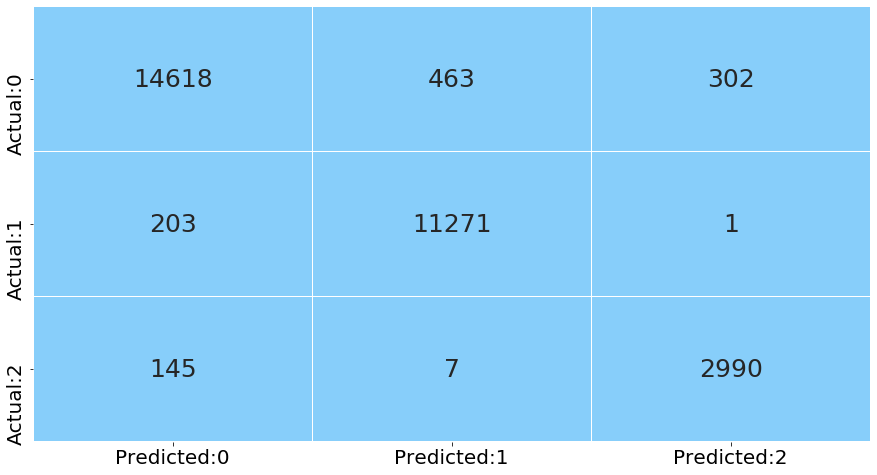

In [53]:
plot_confusion_matrix_2(knc2.fit(X_sm2,Y_sm2))

In [54]:
results1 = pd.DataFrame({
    'KNeighborsClassifier_Model_Type': ['Without flooring','With flooring'],
    'Accuracy': [metrics.accuracy_score(y_test1, knc_preds1)*100,metrics.accuracy_score(y_test2, knc_preds2)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, knc_preds1,average='macro'),metrics.f1_score(y_test2, knc_preds2,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, knc_preds1,average='weighted'),metrics.recall_score(y_test2, knc_preds2,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, knc_preds1,average='macro'),metrics.recall_score(y_test2, knc_preds2,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, knc_preds1,average='weighted'),metrics.f1_score(y_test2, knc_preds2,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, knc_preds1,average='macro'),metrics.precision_score(y_test2, knc_preds2,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, knc_preds1,average='weighted'),metrics.precision_score(y_test2, knc_preds2,average='weighted')]})
result_df1 = results1.sort_values(by=['Accuracy'], ascending=False)
result_df1 = result_df1.set_index('KNeighborsClassifier_Model_Type')
result_df1

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
KNeighborsClassifier_Model_Type,,,,,,,
With flooring,96.263333,0.954529,0.962633,0.961372,0.962685,0.948234,0.963128
Without flooring,92.623333,0.924747,0.926233,0.927875,0.926222,0.921776,0.926284


### 2. Decision Tree Classifier

In [55]:
# A. without flooring outliers

In [56]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification1 = DecisionTreeClassifier(max_depth = 2, criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree1 = decision_tree_classification1.fit(X_sm1,Y_sm1)

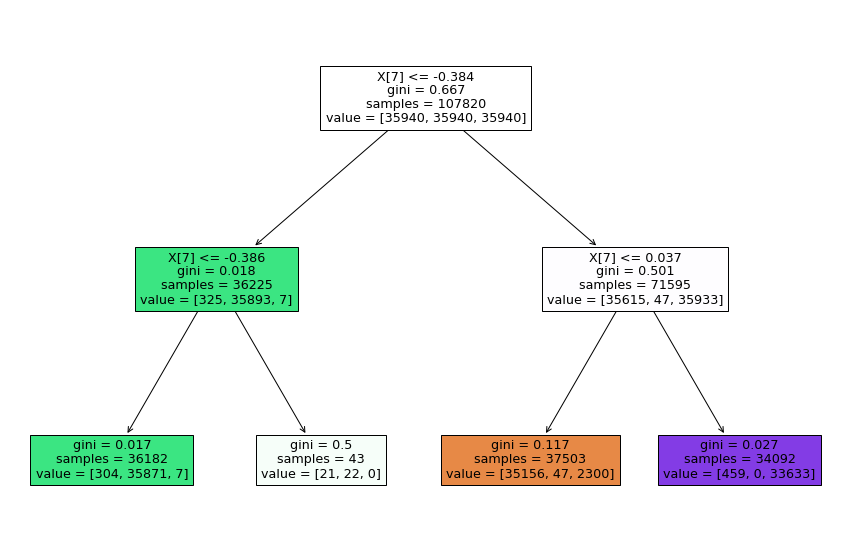

In [57]:
plt.figure(figsize=(15,10))

tree.plot_tree(decision_tree1,filled=True)
plt.show()

In [58]:
# compute the performance measures on test data
# call the function 'get_test_report'

test_report_dt1 = get_test_report_1(decision_tree1)

# print the performace measures
print(test_report_dt1)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     15383
         1.0       0.99      1.00      0.99     11475
         2.0       0.94      0.94      0.94      3142

    accuracy                           0.98     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



In [59]:
# apply the model on unseen testing data
dt_preds1 = decision_tree_classification1.predict(X_test1)

print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test1, dt_preds1))

Accuracy of Random Forest Classifier: 0.9824333333333334


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, dt_preds1)

array([[15061,   146,   176],
       [   15, 11460,     0],
       [  189,     1,  2952]], dtype=int64)

In [61]:
# B. with flooring outliers

In [62]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification2 = DecisionTreeClassifier(max_depth = 2, criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree2 = decision_tree_classification2.fit(X_sm2,Y_sm2)

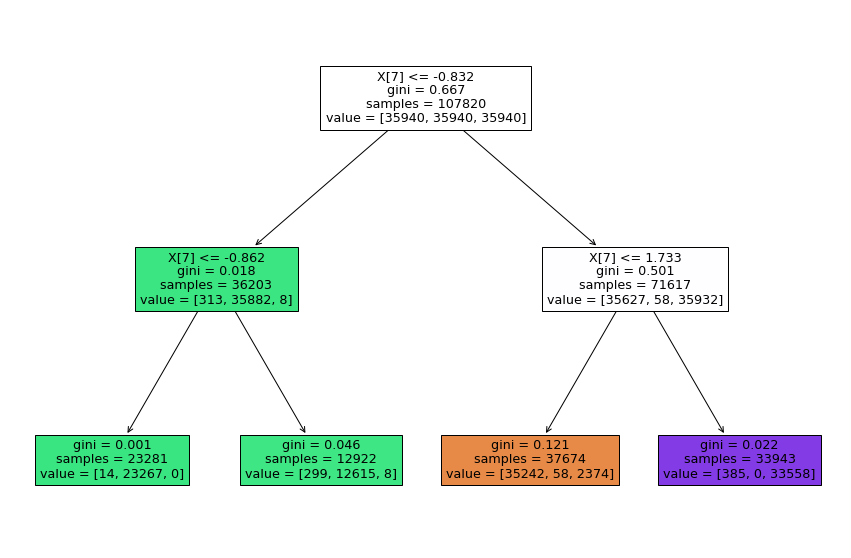

In [63]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree2,filled=True)
plt.show()

In [64]:
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_dt2 = get_test_report_2(decision_tree2)

# print the performace measures
print(test_report_dt2)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     15383
         1.0       0.99      1.00      0.99     11475
         2.0       0.95      0.94      0.94      3142

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



In [65]:
# apply the model on unseen testing data
dt_preds2 = decision_tree_classification2.predict(X_test2)

print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test2, dt_preds2))

Accuracy of Random Forest Classifier: 0.9831666666666666


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, dt_preds2)

array([[15101,   136,   146],
       [   23, 11452,     0],
       [  199,     1,  2942]], dtype=int64)

In [67]:
results2 = pd.DataFrame({
    'DecisionTreeClassifier Model Type': ['Without flooring','With flooring'],
    'Accuracy': [metrics.accuracy_score(y_test1, dt_preds1)*100,metrics.accuracy_score(y_test2, dt_preds2)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, dt_preds1,average='macro'),metrics.f1_score(y_test2, dt_preds2,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, dt_preds1,average='weighted'),metrics.recall_score(y_test2, dt_preds2,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, dt_preds1,average='macro'),metrics.recall_score(y_test2, dt_preds2,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, dt_preds1,average='weighted'),metrics.f1_score(y_test2, dt_preds2,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, dt_preds1,average='macro'),metrics.precision_score(y_test2, dt_preds2,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, dt_preds1,average='weighted'),metrics.precision_score(y_test2, dt_preds2,average='weighted')]})
result_df2 = results2.sort_values(by='Accuracy', ascending=False)
result_df2 = result_df2.set_index('DecisionTreeClassifier Model Type')
result_df2

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
DecisionTreeClassifier Model Type,,,,,,,
With flooring,98.316667,0.973704,0.983167,0.972003,0.983113,0.975470,0.983098
Without flooring,98.243333,0.972482,0.982433,0.972430,0.982401,0.972568,0.982410


###  3. Gaussian Naive Bayes Classifier

In [68]:
# A. without flooring outliers

In [69]:
# import the gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

In [70]:
# define our gaussian naive bayes model
gnc1 = GaussianNB()

# fit our model with training x and y data
gnc1.fit(X_sm1,Y_sm1)

# compute the performance measures on test data
# call the function 'get_test_report'
from sklearn.metrics import classification_report
test_report_gnc1 = get_test_report_1(gnc1.fit(X_sm1,Y_sm1))

# print the performace measures
print(test_report_gnc1)

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     15383
         1.0       0.99      0.98      0.98     11475
         2.0       0.85      0.94      0.90      3142

    accuracy                           0.97     30000
   macro avg       0.94      0.96      0.95     30000
weighted avg       0.97      0.97      0.97     30000



In [71]:
# apply the model on unseen testing data
gnc_preds1 = gnc1.predict(X_test1)

print("Accuracy of Gaussian Naive Bayes Classifier:", metrics.accuracy_score(y_test1, gnc_preds1))

Accuracy of Gaussian Naive Bayes Classifier: 0.9711666666666666


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, gnc_preds1)

array([[14970,   128,   285],
       [   48, 11200,   227],
       [  176,     1,  2965]], dtype=int64)

In [73]:
# B. with flooring outliers

In [74]:
# define our gaussian naive bayes model
gnc2 = GaussianNB()

# fit our model with training x and y data
gnc2.fit(X_sm2,Y_sm2)

# compute the performance measures on test data
# call the function 'get_test_report'
from sklearn.metrics import classification_report
test_report_gnc2 = get_test_report_2(gnc2.fit(X_sm2,Y_sm2))

# print the performace measures
print(test_report_gnc2)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     15383
         1.0       0.99      1.00      0.99     11475
         2.0       0.91      0.94      0.93      3142

    accuracy                           0.98     30000
   macro avg       0.96      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000



In [75]:
# apply the model on unseen testing data
gnc_preds2 = gnc2.predict(X_test2)

print("Accuracy of Gaussian Naive Bayes Classifier:", metrics.accuracy_score(y_test2, gnc_preds2))

Accuracy of Gaussian Naive Bayes Classifier: 0.9781333333333333


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, gnc_preds2)

array([[14966,   131,   286],
       [   48, 11427,     0],
       [  190,     1,  2951]], dtype=int64)

In [77]:
results3 = pd.DataFrame({
    'Gaussian Naive Bayes Classifier Model Type': ['Without flooring','With flooring'],
    'Accuracy': [metrics.accuracy_score(y_test1, gnc_preds1)*100,metrics.accuracy_score(y_test2, gnc_preds2)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, gnc_preds1,average='macro'),metrics.f1_score(y_test2, gnc_preds2,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, gnc_preds1,average='weighted'),metrics.recall_score(y_test2, gnc_preds2,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, gnc_preds1,average='macro'),metrics.recall_score(y_test2, gnc_preds2,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, gnc_preds1,average='weighted'),metrics.f1_score(y_test2, gnc_preds2,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, gnc_preds1,average='macro'),metrics.precision_score(y_test2, gnc_preds2,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, gnc_preds1,average='weighted'),metrics.precision_score(y_test2, gnc_preds2,average='weighted')]})
result_df3 = results3.sort_values(by='Accuracy', ascending=False)
result_df3 = result_df3.set_index('Gaussian Naive Bayes Classifier Model Type')
result_df3

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Gaussian Naive Bayes Classifier Model Type,,,,,,,
With flooring,97.813333,0.965332,0.978133,0.969307,0.978199,0.961524,0.978352
Without flooring,97.116667,0.952452,0.971167,0.964284,0.971639,0.942206,0.972663


In [78]:
results_final_cl = pd.DataFrame({
    'Model Type': ['Without flooring','With flooring'],
    'KNeighborsClassifier Accuracy':[metrics.accuracy_score(y_test1, knc_preds1)*100,metrics.accuracy_score(y_test2, knc_preds2)*100],
    'DecisionTreeClassifier Accuracy': [metrics.accuracy_score(y_test1, dt_preds1)*100,metrics.accuracy_score(y_test2, dt_preds2)*100],
    'GaussianNaiveBayes Classifier Accuracy': [metrics.accuracy_score(y_test1, gnc_preds1)*100,metrics.accuracy_score(y_test2, gnc_preds2)*100]})
results_final_cl_df = results_final_cl.sort_values(by=['KNeighborsClassifier Accuracy','DecisionTreeClassifier Accuracy'], ascending=False)
results_final_cl_df = results_final_cl_df.set_index('Model Type')
results_final_cl_df

,KNeighborsClassifier Accuracy,DecisionTreeClassifier Accuracy,GaussianNaiveBayes Classifier Accuracy
Model Type,,,
With flooring,96.263333,98.316667,97.813333
Without flooring,92.623333,98.243333,97.116667


## Bagging

### Random Forest Classifier

In [79]:
# Without flooring outliers

In [80]:
# define our random forest classifier
rfc1 = RandomForestClassifier()

# train the model using the x and y training sets
rfc1.fit(X_sm1,Y_sm1)

# compute the performance measures on test data
# call the function 'get_test_report'
from sklearn.metrics import classification_report
test_report_rfc1 = get_test_report_1(rfc1.fit(X_sm1,Y_sm1))

# print the performace measures
print(test_report_rfc1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.97      0.96      0.97      3142

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [81]:
# apply the model on unseen testing data
rfc_preds1 = rfc1.predict(X_test1)

print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test1, rfc_preds1))

Accuracy of Random Forest Classifier: 0.9920333333333333


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, rfc_preds1)

array([[15283,    18,    82],
       [   15, 11460,     0],
       [  123,     1,  3018]], dtype=int64)

In [83]:
# With outlier flooring

In [84]:
# define our random forest classifier
rfc2 = RandomForestClassifier()

# train the model using the x and y training sets
rfc2.fit(X_sm2,Y_sm2)

# compute the performance measures on test data
# call the function 'get_test_report'
from sklearn.metrics import classification_report
test_report_rfc2 = get_test_report_2(rfc2.fit(X_sm2,Y_sm2))

# print the performace measures
print(test_report_rfc2)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.97      0.96      0.97      3142

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [85]:
# apply the model on unseen testing data
rfc_preds2 = rfc2.predict(X_test2)

print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test2, rfc_preds2))

Accuracy of Random Forest Classifier: 0.9917666666666667


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, rfc_preds2)

array([[15278,    20,    85],
       [   13, 11462,     0],
       [  128,     1,  3013]], dtype=int64)

In [87]:
results4 = pd.DataFrame({
    'RandomForestClassifier Model Type': ['Without flooring','With flooring'],
    'Accuracy': [metrics.accuracy_score(y_test1, rfc_preds1)*100,metrics.accuracy_score(y_test2, rfc_preds2)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, rfc_preds1,average='macro'),metrics.f1_score(y_test2, rfc_preds2,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, rfc_preds1,average='weighted'),metrics.recall_score(y_test2, rfc_preds2,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, rfc_preds1,average='macro'),metrics.recall_score(y_test2, rfc_preds2,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, rfc_preds1,average='weighted'),metrics.f1_score(y_test2, rfc_preds2,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, rfc_preds1,average='macro'),metrics.precision_score(y_test2, rfc_preds2,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, rfc_preds1,average='weighted'),metrics.precision_score(y_test2, rfc_preds2,average='weighted')]})
result_df4 = results4.sort_values(by='Accuracy', ascending=False)
result_df4 = result_df4.set_index('RandomForestClassifier Model Type')
result_df4

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
RandomForestClassifier Model Type,,,,,,,
Without flooring,99.203333,0.985930,0.992033,0.984242,0.992015,0.987648,0.992008
With flooring,99.176667,0.985413,0.991767,0.983662,0.991747,0.987197,0.991738


In [88]:
# We have test Accuracy of Random Forest Classifier: 0.9886666666666667 ~ 98.86%
#Lets calculate train accuracy to check wehther model is overfitted

In [89]:
from sklearn.metrics import classification_report
test_report_rfc3 = get_test_report_2(rfc2.fit(X_train2,y_train2))

# print the performace measures
print(test_report_rfc3)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.99      0.95      0.97      3142

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [90]:
# apply the model on unseen testing data
rfc_preds3 = rfc2.predict(X_train2)

print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_train2, rfc_preds3))

Accuracy of Random Forest Classifier: 1.0


In [91]:
#From the above output, we can see that there is not much difference between the train and test accuracy; 
#thus, we can conclude that the RandomForestClassifier Model Type is not over-fiited.

## Boosting

### AdaBoost classifier

In [92]:
# Without flooring outliers

In [93]:
from sklearn.ensemble import AdaBoostClassifier
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
AdaBoost=ada_model.fit(X_sm1,Y_sm1)

In [94]:
Ada_preds1 = AdaBoost.predict(X_test1)

In [95]:
print(classification_report(y_test1, Ada_preds1))

              precision    recall  f1-score   support

         0.0       0.63      0.82      0.71     15383
         1.0       0.99      0.54      0.70     11475
         2.0       0.29      0.35      0.31      3142

    accuracy                           0.66     30000
   macro avg       0.64      0.57      0.57     30000
weighted avg       0.73      0.66      0.66     30000



In [96]:
print("Accuracy of AdaBoost Classifier :", metrics.accuracy_score(y_test1, Ada_preds1)*100,'%')

Accuracy of AdaBoost Classifier : 66.10000000000001 %


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, Ada_preds1)

array([[12576,    67,  2740],
       [ 5317,  6158,     0],
       [ 2046,     0,  1096]], dtype=int64)

In [98]:
# With outlier flooring

In [99]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model2 = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
AdaBoost2=ada_model2.fit(X_sm2,Y_sm2)

In [100]:
Ada_preds2 = AdaBoost2.predict(X_test2)

In [101]:
print(classification_report(y_test2, Ada_preds2))

              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74     15383
         1.0       0.99      0.88      0.93     11475
         2.0       0.27      0.54      0.36      3142

    accuracy                           0.75     30000
   macro avg       0.68      0.71      0.68     30000
weighted avg       0.81      0.75      0.77     30000



In [102]:
print("Accuracy of AdaBoost Classifier :", metrics.accuracy_score(y_test2, Ada_preds2)*100,'%')

Accuracy of AdaBoost Classifier : 75.05333333333334 %


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, Ada_preds2)

array([[10685,   127,  4571],
       [ 1338, 10137,     0],
       [ 1447,     1,  1694]], dtype=int64)

In [104]:
results5 = pd.DataFrame({
    'AdaBoost classifier Model Type': ['Without flooring','With flooring'],
    'Accuracy': [metrics.accuracy_score(y_test1, Ada_preds1)*100,metrics.accuracy_score(y_test2, Ada_preds2)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, Ada_preds1,average='macro'),metrics.f1_score(y_test2, Ada_preds2,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, Ada_preds1,average='weighted'),metrics.recall_score(y_test2, Ada_preds2,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, Ada_preds1,average='macro'),metrics.recall_score(y_test2, Ada_preds2,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, Ada_preds1,average='weighted'),metrics.f1_score(y_test2, Ada_preds2,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, Ada_preds1,average='macro'),metrics.precision_score(y_test2, Ada_preds2,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, Ada_preds1,average='weighted'),metrics.precision_score(y_test2, Ada_preds2,average='weighted')]})
result_df5 = results5.sort_values(by='Accuracy', ascending=False)
result_df5 = result_df5.set_index('AdaBoost classifier Model Type')
result_df5

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
AdaBoost classifier Model Type,,,,,,,
With flooring,75.053333,0.677792,0.750533,0.705715,0.774208,0.683722,0.812799
Without flooring,66.100000,0.574009,0.661000,0.567664,0.664180,0.635225,0.731721


### Gradient Boosting classifier

In [105]:
# Without flooring outliers

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_model1 = GradientBoostingClassifier(n_estimators = 150, max_depth = 5, random_state = 10)

# fit the model using fit() on train data
GradientBoosting1=gboost_model1.fit(X_sm1,Y_sm1)

In [107]:
gb_preds1 = GradientBoosting1.predict(X_test1)

In [108]:
print(classification_report(y_test1, gb_preds1))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.96      0.96      0.96      3142

    accuracy                           0.99     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000



In [109]:
print("Accuracy of Gradient Boosting Classifier :", metrics.accuracy_score(y_test1, gb_preds1)*100,'%')

Accuracy of Gradient Boosting Classifier : 99.10333333333334 %


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, gb_preds1)

array([[15242,    21,   120],
       [   12, 11462,     1],
       [  115,     0,  3027]], dtype=int64)

In [111]:
# With flooring outliers

In [112]:
gboost_model2 = GradientBoostingClassifier(n_estimators = 150, max_depth = 5, random_state = 10)

# fit the model using fit() on train data
GradientBoosting2=gboost_model2.fit(X_sm2,Y_sm2)

In [113]:
gb_preds2 = GradientBoosting2.predict(X_test2)

In [114]:
print(classification_report(y_test2, gb_preds2))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.96      0.96      0.96      3142

    accuracy                           0.99     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.99      0.99      0.99     30000



In [115]:
print("Accuracy of Gradient Boosting Classifier :", metrics.accuracy_score(y_test2, gb_preds2)*100,'%')

Accuracy of Gradient Boosting Classifier : 99.08666666666667 %


In [116]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, gb_preds2)

array([[15238,    19,   126],
       [   10, 11465,     0],
       [  119,     0,  3023]], dtype=int64)

In [117]:
results6 = pd.DataFrame({
    'Gradient Boosting Model Type': ['Without flooring','With flooring'],
    'Accuracy': [metrics.accuracy_score(y_test1, gb_preds1)*100,metrics.accuracy_score(y_test2, gb_preds2)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, gb_preds1,average='macro'),metrics.f1_score(y_test2, gb_preds2,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, gb_preds1,average='weighted'),metrics.recall_score(y_test2, gb_preds2,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, gb_preds1,average='macro'),metrics.recall_score(y_test2, gb_preds2,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, gb_preds1,average='weighted'),metrics.f1_score(y_test2, gb_preds2,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, gb_preds1,average='macro'),metrics.precision_score(y_test2, gb_preds2,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, gb_preds1,average='weighted'),metrics.precision_score(y_test2, gb_preds2,average='weighted')]})
result_df6 = results6.sort_values(by='Accuracy', ascending=False)
result_df6 = result_df6.set_index('Gradient Boosting Model Type')
result_df6

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Gradient Boosting Model Type,,,,,,,
Without flooring,99.103333,0.984095,0.991033,0.984367,0.991035,0.983824,0.991038
With flooring,99.086667,0.983627,0.990867,0.983943,0.990869,0.983313,0.990872


### XGBoost (eXtreme Gradient Boost) Classifier

In [118]:
# Without flooring outliers

In [119]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model1 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model1.fit(X_sm1,Y_sm1)

XGBClassifier(gamma=1, max_depth=10, objective='multi:softprob')

In [120]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report_xgb1 = get_test_report_1(xgb_model1)

# print the performance measures
print(test_report_xgb1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.97      0.97      0.97      3142

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [121]:
y_pred_xgb1 =xgb_model1.predict(X_test1)
print("Accuracy of XGBClassifier = ", metrics.accuracy_score(y_test1,y_pred_xgb1))

Accuracy of XGBClassifier =  0.9927


In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1,y_pred_xgb1)

array([[15283,    16,    84],
       [   11, 11464,     0],
       [  108,     0,  3034]], dtype=int64)

In [123]:
# With outlier flooring

In [124]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model2 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model2.fit(X_sm2,Y_sm2)

XGBClassifier(gamma=1, max_depth=10, objective='multi:softprob')

In [125]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report_xgb2 = get_test_report_2(xgb_model2)

# print the performance measures
print(test_report_xgb2)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.97      0.96      0.97      3142

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [126]:
y_pred_xgb2 = xgb_model2.predict(X_test2)
print("Accuracy of XGBClassifier = ", metrics.accuracy_score(y_test2,y_pred_xgb2))

Accuracy of XGBClassifier =  0.9923666666666666


In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2,y_pred_xgb2)

array([[15274,    18,    91],
       [    9, 11466,     0],
       [  111,     0,  3031]], dtype=int64)

In [128]:
results4 = pd.DataFrame({
    'XGBClassifier Model Type': ['Without flooring','With flooring'],
    'Accuracy': [metrics.accuracy_score(y_test1, y_pred_xgb1)*100,metrics.accuracy_score(y_test2, y_pred_xgb2)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, y_pred_xgb1,average='macro'),metrics.f1_score(y_test2, y_pred_xgb2,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, y_pred_xgb1,average='weighted'),metrics.recall_score(y_test2, y_pred_xgb2,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, y_pred_xgb1,average='macro'),metrics.recall_score(y_test2, y_pred_xgb2,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, y_pred_xgb1,average='weighted'),metrics.f1_score(y_test2, y_pred_xgb2,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, y_pred_xgb1,average='macro'),metrics.precision_score(y_test2, y_pred_xgb2,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, y_pred_xgb1,average='weighted'),metrics.precision_score(y_test2, y_pred_xgb2,average='weighted')]})
result_df4 = results4.sort_values(by='Accuracy', ascending=False)
result_df4 = result_df4.set_index('XGBClassifier Model Type')
result_df4

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
XGBClassifier Model Type,,,,,,,
Without flooring,99.270000,0.987013,0.992700,0.986056,0.992690,0.987980,0.992684
With flooring,99.236667,0.986379,0.992367,0.985601,0.992357,0.987163,0.992351


<b>We can see that both XGBoost and Scikit-Learn's Random Forest Classifier could achieve very high accuracy.</b>

<h3>XGBoost - Tune the Hyperparameters (GridSearchCV)</h3>

In [129]:
# The following model implements the best performing model with optimal parameters evaluated by the hyperparameter tuning. 
# We will expect the model to perform even better than before.

In [130]:
unique, counts = np.unique(Y_sm2, return_counts=True)
dict(zip(unique, counts))

{0.0: 35940, 1.0: 35940, 2.0: 35940}

In [131]:
xgb_cv1 = XGBClassifier(n_estimators=100)
scores1 = cross_val_score(xgb_cv1,X_sm2,Y_sm2, cv=10, scoring = "accuracy")
print("Scores:", scores1)
print("Mean:", scores1.mean())
print("Standard Deviation:", scores1.std())

Scores: [0.97801892 0.98107958 0.97894639 0.97959562 0.97987386 0.98228529
 0.98154331 0.98256353 0.98005936 0.98070859]
Mean: 0.9804674457429048
Standard Deviation: 0.001373910902403345


Scores: [0.98676749 , 0.99338374 , 0.99149338 , 0.99338374 , 0.9952741 , 0.99243141 ,
 0.98959319 , 0.99148534 , 0.99053926 , 0.99148534]
 
Mean: 0.9915836989160391

Standard Deviation: 0.0022157256761928114

In [132]:
predictions = cross_val_predict(xgb_cv1, X_sm2,Y_sm2, cv=3)
confusion_matrix(Y_sm2, predictions)

array([[35464,    48,   428],
       [   37, 35903,     0],
       [ 1549,     9, 34382]], dtype=int64)

<b>The first row shows that out of 3525 stars, 3473 were classified correctly as stars. 13 stars were classified incorrectly as galaxies and 39 stars were classified incorrectly as quasars.<br><br>

The second row tells us that out of 3525 galaxies 3523 were classified correctly.. 2 galaxies were classified incorrectly as star.<br><br>

The last row shows out of 3525 quasars 3477 were classified correctly. 47 qsos were classified incorrectly as stars and 1 quasar was classified as galaxy.<br><br>

In total:<br>

We have only 102 objects which were classified incorrectly. Most of the objects were identified as what they actually are.</b>

<h1>Precision & Recall</h1>

In [133]:
print("Precision:", precision_score(Y_sm2, predictions, average='micro'))
print("Recall:",recall_score(Y_sm2, predictions, average='micro'))

Precision: 0.9807920608421443
Recall: 0.9807920608421443


<b>Precision is the fraction of events where the algorithm classified an object of type t correctly out of all occurences of the algorithm classifying objects of type t.

Recall is the fraction of events where the algorithm classified an object of type t correctly when the true type of that object was actually t.

Precision in our case:

For every class its calculated how many objects were classified as stars (or galaxies or quasars) in relation to the amount of correct star (or galaxies or quasars) predictions. The results are averaged --> 99%.

Recall in our case:

For every class its calculated how many objects were classified as stars (or galaxies or quasars) in relation to the total amount of predictions where the object actually was a star (or galaxy or quasar). The results are averaged --> 99%.

In both cases our algorithm did a very good job. The highest precision or recall value a predictor can have is 1.0.</b>

<h1>F1-Score</h1>

<b>One can combine precision and recall into one score, which is called the F1-score. The F1-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F1-score, if both recall and precision are high.</b>

In [134]:
print("F1-Score:", f1_score(Y_sm2, predictions,average='micro'))

F1-Score: 0.9807920608421443


<b>As precision and recall have the same value the F1-Score has automatically the same value too. Again, we are very close to 1.0 which indicates strong performance.</b>

<h1>Conclusion</h1>

<b>Through this notebook, we have analyzed the SDSS data (we learned some very interesting facts about our space along the way), how to build a machine learning model to predict for unseen data from this data set and how to improve its performance (even though there was only a slight improvent). We used XGBoost for predicting and evaluated its result.</b>